<a href="https://colab.research.google.com/github/zasminah/Python_MachineLearning/blob/main/Prediction_BostonHousingPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
import sklearn.datasets
import sklearn.linear_model
import sklearn.metrics
import sklearn.tree
import sklearn.preprocessing
import sklearn.ensemble 
import xgboost 
import seaborn as sns


The dataset used in this project comes from the UCI Machine Learning Repository. This data was collected in 1978 and each of the 506 entries represents aggregate information about 13 features of homes from various suburbs located in Boston.
The features can be summarized as follows:



*   CRIM: This is the per capita crime rate by town

*   ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
*   INDUS: This is the proportion of non-retail business acres per town.
*   CHAS: This is the Charles River dummy variable (this is equal to 1 if tract -.bounds river; 0 otherwise)
*   NOX: This is the nitric oxides concentration (parts per 10 million)
*   RM: This is the average number of rooms per dwelling
*   AGE: This is the proportion of owner-occupied units built prior to 1940
*   DIS: This is the weighted distances to five Boston employment centers
*   RAD: This is the index of accessibility to radial highways
*   TAX: This is the full-value property-tax rate per $10000s

*   PTRATIO: This is the pupil-teacher ratio by town
*   B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
*   LSTAT: This is the percentage lower status of the population


In [ ]:
boston = sklearn.datasets.load_boston()
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [ ]:
X = boston['data']
y = boston['target']
features = boston['feature_names']
print(features, X.shape, y.shape)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT'] (506, 13) (506,)


In [ ]:
df = pd.DataFrame(X, columns=features, index=None)
df['Price'] = y
print(df.head())
print(df.describe())
print(df.info())

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  Price
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]
             CRIM          ZN       INDUS  ...           B       LSTAT       Price
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000

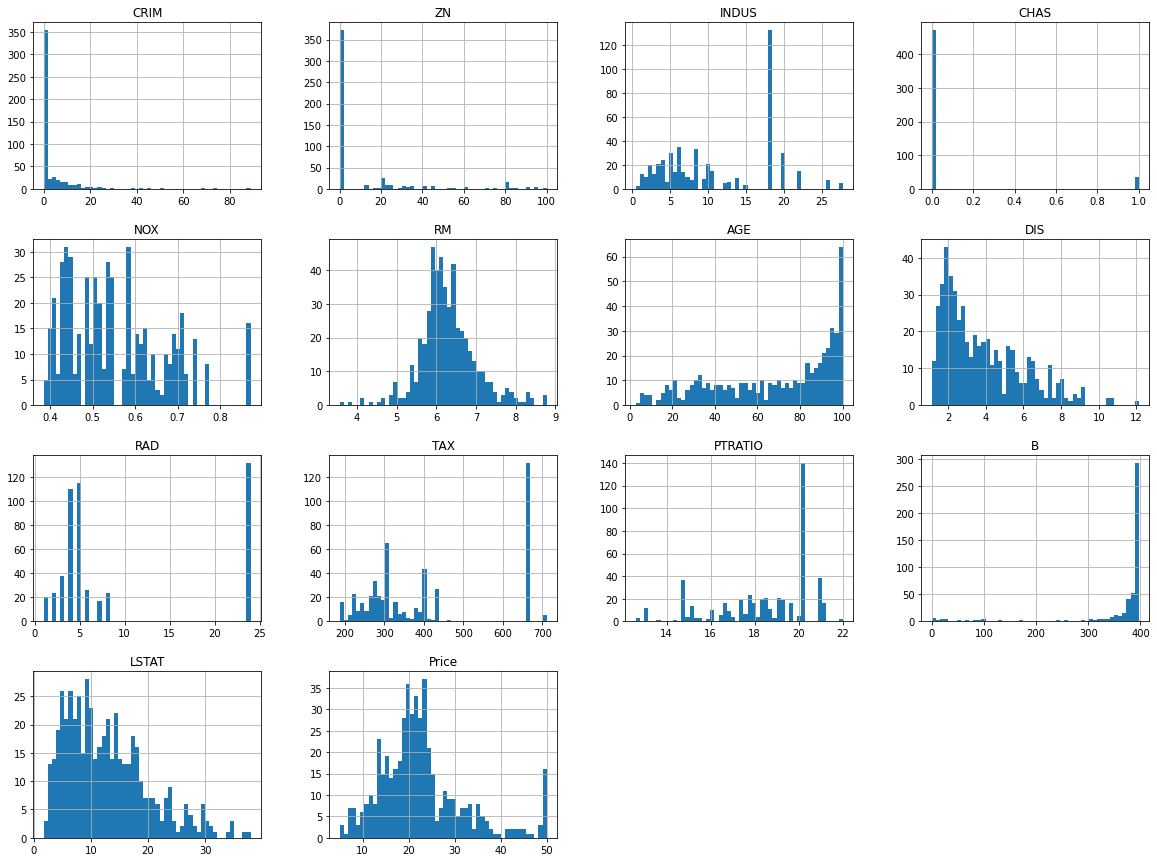

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
corr = df.corr()
print(corr)

             CRIM        ZN     INDUS  ...         B     LSTAT     Price
CRIM     1.000000 -0.200469  0.406583  ... -0.385064  0.455621 -0.388305
ZN      -0.200469  1.000000 -0.533828  ...  0.175520 -0.412995  0.360445
INDUS    0.406583 -0.533828  1.000000  ... -0.356977  0.603800 -0.483725
CHAS    -0.055892 -0.042697  0.062938  ...  0.048788 -0.053929  0.175260
NOX      0.420972 -0.516604  0.763651  ... -0.380051  0.590879 -0.427321
RM      -0.219247  0.311991 -0.391676  ...  0.128069 -0.613808  0.695360
AGE      0.352734 -0.569537  0.644779  ... -0.273534  0.602339 -0.376955
DIS     -0.379670  0.664408 -0.708027  ...  0.291512 -0.496996  0.249929
RAD      0.625505 -0.311948  0.595129  ... -0.444413  0.488676 -0.381626
TAX      0.582764 -0.314563  0.720760  ... -0.441808  0.543993 -0.468536
PTRATIO  0.289946 -0.391679  0.383248  ... -0.177383  0.374044 -0.507787
B       -0.385064  0.175520 -0.356977  ...  1.000000 -0.366087  0.333461
LSTAT    0.455621 -0.412995  0.603800  ... -0.36608

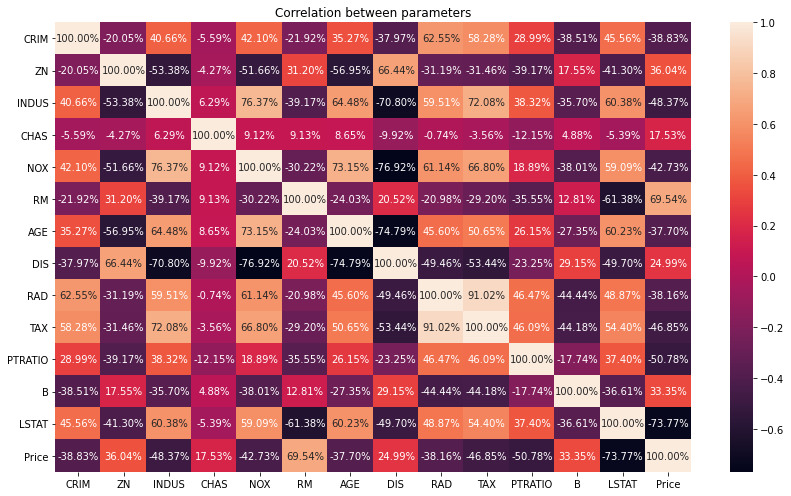

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(corr, fmt='.2%', annot=True)
plt.title("Correlation between parameters")
plt.tight_layout()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f723e266890>,
      dtype=object)

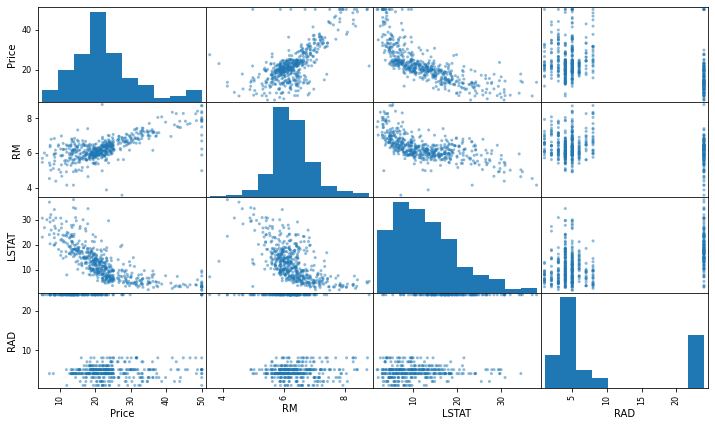

In [ ]:
attributes = ['Price','RM', 'LSTAT','RAD']
pd.plotting.scatter_matrix(df[attributes], figsize=(12,7))

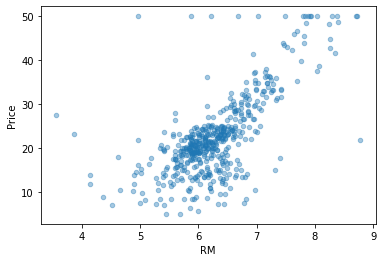

In [ ]:
df.plot(kind='scatter', x='RM', y='Price', alpha = 0.4)

In [ ]:
prediction = []

결정계수(Coefficient of determination, R2, R-squared, 피어슨 상관계수의 제곱) : 1에 가까울수록 추정된 회귀선이 변수 사이의 관계를 완전히 설명해 주고 있는 것


1) Linear Regression

In [ ]:
model = sklearn.linear_model.LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)
acc = sklearn.metrics.r2_score(y,y_pred)
print(acc)
prediction.append(y_pred)

0.7406426641094095


2) Decision Tree

In [ ]:
model = sklearn.tree.DecisionTreeRegressor()
model.fit(X,y)
y_pred = model.predict(X)
acc = sklearn.metrics.r2_score(y,y_pred)
print(acc)
prediction.append(y_pred)

1.0


3) StandardScaler & SVM
- 피처의 값들이 표준정규분포(평균이 0, 표준편차가 1)에 있도록 변환함.(0을 중심으로 데이터 분포)

- 특히 가우시안 정규분포를 가정하는 SVM 이나 선형회귀, 로지스틱 회귀 알고리즘의 성능 향상에 도움이 됨.


In [ ]:
sc = sklearn.preprocessing.StandardScaler()
x_ = sc.fit_transform(X)
model = sklearn.svm.SVR()
model.fit(x_, y)
y_pred = model.predict(x_)
acc = sklearn.metrics.r2_score(y, y_pred)
print(acc)
prediction.append(y_pred)

0.7028285706092579


4) RandomForestRegressor

In [ ]:
model = sklearn.ensemble.RandomForestRegressor()
model.fit(X, y)
y_pred = model.predict(X)
acc = sklearn.metrics.r2_score(y, y_pred)
print(acc)
prediction.append(y_pred)

0.9823682949403151
